In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
path = "checkpoints/EnsWeight_lr0.01_hd30"
conf_mat_path = os.path.join(path,"last_test_confmat.csv")
metrics_path = os.path.join(path,"last_test_metrics.csv")

In [31]:
confmat = pd.read_csv(conf_mat_path, index_col=0)
confmat.astype("int32")
metrics = pd.read_csv(metrics_path, index_col=0)
metrics = metrics.transpose()

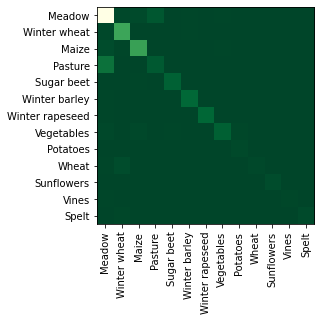

In [29]:
# Draw confusion matrix
plt.imshow(confmat.to_numpy(), cmap="YlGn_r")
plt.xticks(np.arange(13), confmat.columns, rotation=90)
plt.yticks(np.arange(13), confmat.columns)
plt.title("Confusion matrix on test dataset")
plt.xlabel("")
plt.savefig(os.path.join(path, "confmat.png"), bbox_inches="tight")
plt.show()

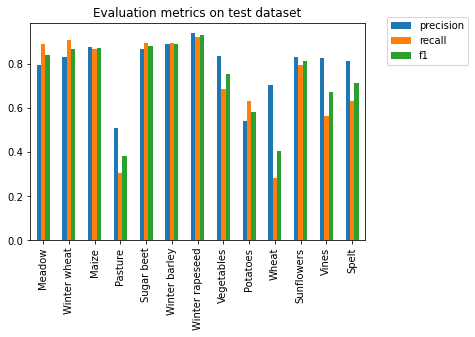

In [48]:
# Draw matrix
ax = metrics.plot(kind="bar")
ax.legend(bbox_to_anchor=(1.05,1.05))
plt.title("Evaluation metrics on test dataset")
plt.savefig(os.path.join(path, "metrics.png"), bbox_inches="tight")
plt.show()

In [18]:
confmat.style.background_gradient(cmap='Blues')

,Meadow,Winter wheat,Maize,Pasture,Sugar beet,Winter barley,Winter rapeseed,Vegetables,Potatoes,Wheat,Sunflowers,Vines,Spelt
Meadow,323376.000000,3924.000000,6802.000000,22652.000000,1127.000000,1309.000000,1112.000000,1837.000000,229.000000,169.000000,159.000000,549.000000,305.000000
Winter wheat,4847.000000,115409.000000,768.000000,72.000000,409.000000,2128.000000,408.000000,567.000000,576.000000,1230.000000,190.000000,2.000000,745.000000
Maize,9056.000000,2499.000000,109898.000000,188.000000,963.000000,555.000000,322.000000,1822.000000,468.000000,92.000000,606.000000,9.000000,67.000000
Pasture,54743.000000,288.000000,469.000000,24675.000000,203.000000,117.000000,158.000000,129.000000,24.000000,4.000000,21.000000,185.000000,31.000000
Sugar beet,1080.000000,818.000000,1331.000000,17.000000,33271.000000,87.000000,78.000000,336.000000,115.000000,0.000000,68.000000,6.000000,11.000000
Winter barley,1990.000000,1176.000000,725.000000,50.000000,98.000000,41927.000000,85.000000,208.000000,67.000000,459.000000,29.000000,0.000000,53.000000
Winter rapeseed,1869.000000,640.000000,535.000000,68.000000,15.000000,104.000000,39808.000000,71.000000,40.000000,7.000000,12.000000,0.000000,70.000000
Vegetables,4723.000000,919.000000,3853.000000,81.000000,1495.000000,218.000000,180.000000,32400.000000,2893.000000,11.000000,327.000000,25.000000,101.000000
Potatoes,429.000000,290.000000,423.000000,16.000000,552.000000,15.000000,25.000000,1169.000000,5410.000000,2.000000,242.000000,3.000000,4.000000
Wheat,1274.000000,9916.000000,172.000000,3.000000,3.000000,406.000000,48.000000,21.000000,1.000000,4746.000000,148.000000,0.000000,102.000000
